<a href="https://colab.research.google.com/github/adphelps/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

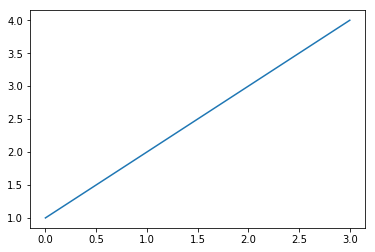

In [4]:
plt.plot([1, 2, 3, 4]);

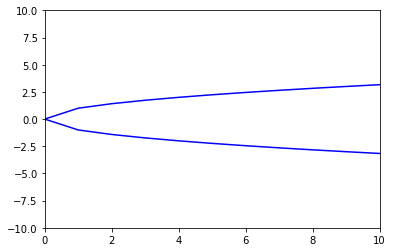

In [13]:
x = []
x2 = []
for n in range(15):
  x.append(n**.5)
  x2.append(-n**.5)
plt.plot(x, 'b')
plt.plot(x2, 'b')
plt.xlim(0, 10)
plt.ylim(-10, 10)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

The definition of a function requires only one output for each input. Vertical line tests are simply visual representations of this.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only one that is a function. The rest would fail a vertical line test

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

For m, The input is in 3 dimensions, and the output is also 3 dimensions
For n, the input is 4 dimensions and the output is only 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

I suppose you technically could, but it wouldn't add anything to do that. Say for instance you went from 2d to 3d, you'd just have a straight line going through a 3d plane.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
Tp = np.array([[1, 3],
     [-1, 2]])

Tq = np.array([[4, 1, 2],
     [-1, 2, 3],
     [5, 1, -2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [21]:
input1 = np.array([[1],
                   [2]])
P = np.array([[1 + 3*2],
             [-1 + 2*3]])
print(P)

input2 = np.array([[1],
                  [2],
                  [3]])
Q = np.array([[4 + 2 + 2*3],
             [-1 + 2*2 + 3+3],
             [5 + 2 - 2*3]])
print(Q)

print(np.matmul(Tp, input1))
print(np.matmul(Tq, input2))


[[7]
 [5]]
[[12]
 [ 9]
 [ 1]]
[[7]
 [3]]
[[12]
 [12]
 [ 1]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.


Eigenvectors are vectors that don't change direction when a linear transformation is applied. The values of each transformation is that Eigenvector's Eigenvalue

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

making visualizations that make sense mostly, as well as computational workload

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have around 5 times the number of observations as you have parameters, but this can vary based on intuition and other factors

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:, ['species']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [37]:
pca = PCA(n_components = 2)
components = pca.fit_transform(x)
principaldf = pd.DataFrame(data = components, columns = ['principal component 1', 'principal component 2'])
principaldf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [38]:
df[['species']].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [40]:
finaldf = pd.concat([principaldf, df[['species']]], axis = 1)
finaldf.head()

,principal component 1,principal component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


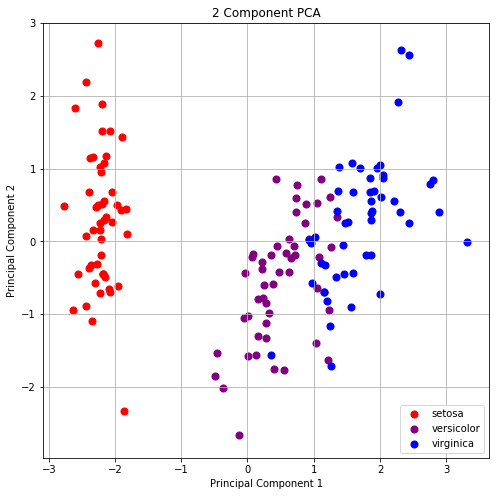

In [43]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component PCA')

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'purple', 'b']
for target, color in zip(targets, colors):
  indicesToKeep = finaldf['species'] == target
  ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1'],
            finaldf.loc[indicesToKeep, 'principal component 2'],
            c = color, s = 50)
  ax.legend(targets)
  ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)